In [1]:
import numpy as np
from scipy.linalg import lstsq, norm, eig, pinv
from numpy.random import rand, randn, permutation
import matplotlib.pyplot as plt

In [6]:
def norms(X,p):         
# % Inputs:       X is a (D x N) matrix            
# %               p is the norm to compute
# %
# % Outputs:      vector of size N whose elements are the p-norms of the columns of X
    return sum(abs(X)**p)**(1/p)

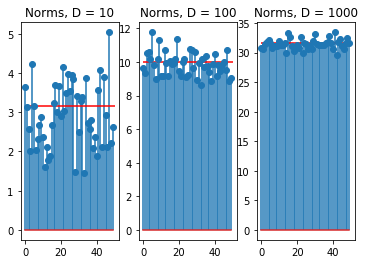

In [9]:
D = [10, 100, 1000]
N = 50

fig, axes = plt.subplots(nrows=1,ncols=3)
for dd, d in enumerate(D):
    # Create a matrix and calculate the the lp-norm of each column
    X = randn(d,N)
    n = norms(X,2)

    axes[dd].stem(np.arange(N),n,use_line_collection=True)
    # As dimension increases, l2 norm of std. normal vector concentrates around sqrt(dim)
    axes[dd].hlines(d**(1/2),xmin=0,xmax=N,color='r')
    axes[dd].set_title('Norms, D = %d'%d)

In [10]:
def normalize(X,p):
# % Inputs:       X is a (D x N) matrix               
# %               p is the norm to compute
# %               
# % Outputs:      Xn is the (D x N) matrix whose columns have unit p-norm 
    return X/norms(X,p)

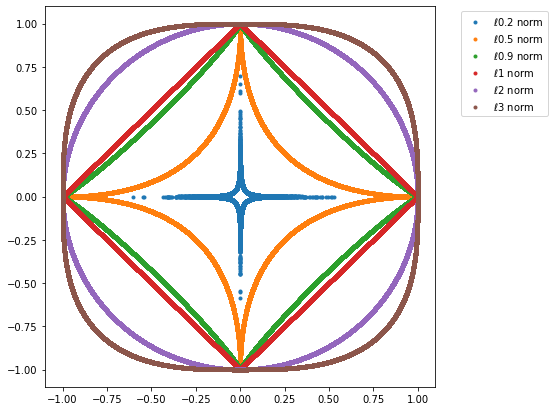

In [19]:
# Visualize the lp-norm ball for different norms
pRange = [0.2, 0.5, 0.9, 1, 2, 3]

D, N = 2, 10**5
X = randn(D,N)
plt.figure(figsize=(7,7))
for p in pRange:
    Xn = normalize(X,p)
    plt.plot(Xn[0,:],Xn[1,:],'.',label=f'$\ell {p}$ norm')
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1.0));